In [1]:
import os
from pathlib import Path as pth
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.linalg import svd
from sklearn.decomposition import PCA
from pyslingshot import Slingshot
import anndata as ad
import scanpy as sc


/Users/canderson/miniconda3/envs/traj-alignment/lib/python3.12/site-packages/pyslingshot/slingshot.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


### Set Working Directory

In [2]:
os.chdir(pth.home() / 'traj-alignment')

### Load and Filter Data

In [3]:

file_path = pth('processed-data/covid-pbmc-filtered.h5ad')
if not file_path.exists() :
    adata = ad.read_h5ad('raw-data/meyer_nikolic_covid_pbmc_raw.h5ad')

    # filter for T CD4+
    adata = adata[adata.obs.annotation_broad == 'T CD4+']

    # filter for adults
    adata = adata[adata.obs.Age_group == 'Adult']

    # filter for Europeans
    adata = adata[adata.obs.Ethnicity == 'EUR']

    adata.write_h5ad(file_path)
    
else:
    adata = ad.read_h5ad(file_path)


In [4]:
import re

def snake_case(name: str) -> str:
    s1 = re.sub('(.)([A-Z][a-z]+)', r'\1_\2', name)
    s2 = re.sub('([a-z0-9])([A-Z])', r'\1_\2', s1)
    return s2.lower()

# rename obs 
adata.obs.columns = [snake_case(name) for name in adata.obs.columns]

adata.obs

,orig.ident,n_count_rna,n_feature_rna,n_count_adt,n_feature_adt,age_group,bmi,covid_severity,covid_status,ethnicity,group,sex,smoker,annotation_broad,annotation_detailed,annotation_detailed_full_names,patient_id,sample_id,sequencing_library,protein_modality_weight
index,,,,,,,,,,,,,,,,,,,,
CV001_KM10202384-CV001_KM10202394_AAACCTGAGTGTCCCG-1,CV001_KM10202384-CV001_KM10202394,4868.0,1577,2169.0,165,Adult,Unknown,Healthy,Healthy,EUR,Adult,Female,Non-smoker,T CD4+,T CD4 helper,T CD4 helper,AN5,AN5,CV001_KM10202384-CV001_KM10202394,0.577522
CV001_KM10202384-CV001_KM10202394_AAACCTGCAGATGGGT-1,CV001_KM10202384-CV001_KM10202394,3178.0,1257,1330.0,163,Adult,Unknown,Healthy,Healthy,EUR,Adult,Male,Non-smoker,T CD4+,T CD4 helper,T CD4 helper,AN3,AN3,CV001_KM10202384-CV001_KM10202394,0.369143
CV001_KM10202384-CV001_KM10202394_AAACCTGGTGTGCGTC-1,CV001_KM10202384-CV001_KM10202394,1902.0,954,1711.0,166,Adult,Unknown,Healthy,Healthy,EUR,Adult,Female,Non-smoker,T CD4+,T CD4 naive,T CD4 naive,AN5,AN5,CV001_KM10202384-CV001_KM10202394,0.564174
CV001_KM10202384-CV001_KM10202394_AAACGGGCAATGCCAT-1,CV001_KM10202384-CV001_KM10202394,3419.0,1215,1887.0,168,Adult,Unknown,Healthy,Healthy,EUR,Adult,Female,Non-smoker,T CD4+,T CD4 naive,T CD4 naive,AN5,AN5,CV001_KM10202384-CV001_KM10202394,0.716076
CV001_KM10202384-CV001_KM10202394_AAACGGGTCATGTGGT-1,CV001_KM10202384-CV001_KM10202394,3063.0,1201,2131.0,165,Adult,Unknown,Healthy,Healthy,EUR,Adult,Female,Non-smoker,T CD4+,T CD4 helper,T CD4 helper,AN5,AN5,CV001_KM10202384-CV001_KM10202394,0.612124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CV001_KM9294396-CV001_KM9294404_TTTGGTTTCACGACTA-1,CV001_KM9294396-CV001_KM9294404,912.0,350,1177.0,167,Adult,27.17,Severe,Post-COVID-19,EUR,Adult,Male,Non-smoker,T CD4+,T CD4 naive,T CD4 naive,PC9,PC9,CV001_KM9294396-CV001_KM9294404,0.261243
CV001_KM9294396-CV001_KM9294404_TTTGGTTTCACGGTTA-1,CV001_KM9294396-CV001_KM9294404,600.0,401,806.0,140,Adult,27.17,Severe,Post-COVID-19,EUR,Adult,Male,Non-smoker,T CD4+,T CD4 CTL,T CD4 CTL,PC9,PC9,CV001_KM9294396-CV001_KM9294404,0.407896
CV001_KM9294396-CV001_KM9294404_TTTGGTTTCCCTAACC-1,CV001_KM9294396-CV001_KM9294404,642.0,298,690.0,140,Adult,27.17,Severe,Post-COVID-19,EUR,Adult,Male,Non-smoker,T CD4+,T CD4 naive,T CD4 naive,PC9,PC9,CV001_KM9294396-CV001_KM9294404,0.612948


#### Normalize 

In [5]:
# scanpy normalize_total and log1p functions
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform - log the data and adds a pseudo-count of 1
scales_counts = sc.pp.log1p(scales_counts["X"], copy=True)

adata.layers['logcounts'] = scales_counts

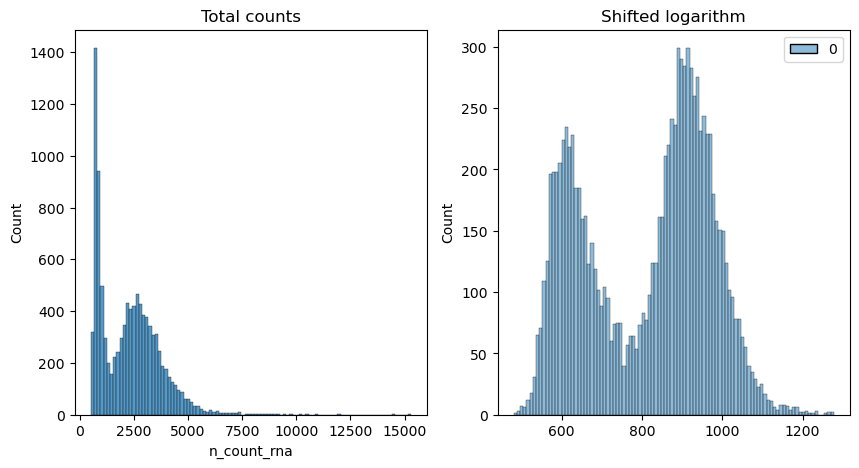

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.obs["n_count_rna"], bins=100, kde=False, ax=axes[0])
axes[0].set_title("Total counts")
p2 = sns.histplot(scales_counts.sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Shifted logarithm")
plt.show()

In [7]:
adata

AnnData object with n_obs × n_vars = 10402 × 33559
    obs: 'orig.ident', 'n_count_rna', 'n_feature_rna', 'n_count_adt', 'n_feature_adt', 'age_group', 'bmi', 'covid_severity', 'covid_status', 'ethnicity', 'group', 'sex', 'smoker', 'annotation_broad', 'annotation_detailed', 'annotation_detailed_full_names', 'patient_id', 'sample_id', 'sequencing_library', 'protein_modality_weight'
    var: 'name'
    layers: 'logcounts'

#### Select Highest Variable Genes

Highly variable genes: 1362


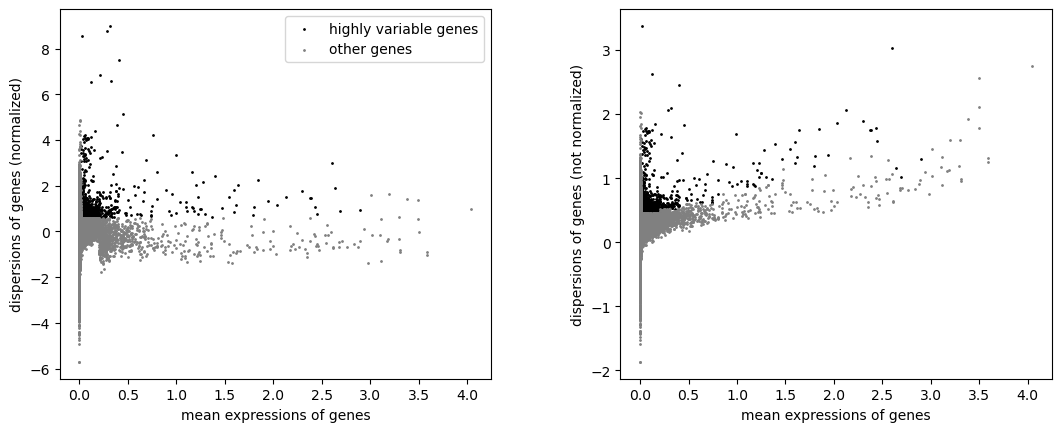

In [8]:
# compute variable genes on logcounts
sc.pp.highly_variable_genes(adata, layer = 'logcounts', min_mean=0.0125, max_mean=3, min_disp=0.6)
print("Highly variable genes: %d"%sum(adata.var.highly_variable))

#plot variable genes
sc.pl.highly_variable_genes(adata)


In [9]:
# subset for variable genes in the dataset
adata = adata[:, adata.var['highly_variable']]

#### Scale

In [10]:
# scales logcounts, writes to adata.X
sc.pp.scale(adata, layer= 'logcounts', max_value=10, zero_center = False )

/Users/canderson/miniconda3/envs/traj-alignment/lib/python3.12/site-packages/scanpy/preprocessing/_scale.py:309: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


#### Reduced Dimensions

In [11]:
adata

AnnData object with n_obs × n_vars = 10402 × 1362
    obs: 'orig.ident', 'n_count_rna', 'n_feature_rna', 'n_count_adt', 'n_feature_adt', 'age_group', 'bmi', 'covid_severity', 'covid_status', 'ethnicity', 'group', 'sex', 'smoker', 'annotation_broad', 'annotation_detailed', 'annotation_detailed_full_names', 'patient_id', 'sample_id', 'sequencing_library', 'protein_modality_weight'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg'
    layers: 'logcounts'

In [12]:
# pca on X written to X
sc.tl.pca(adata)


In [13]:
adata

AnnData object with n_obs × n_vars = 10402 × 1362
    obs: 'orig.ident', 'n_count_rna', 'n_feature_rna', 'n_count_adt', 'n_feature_adt', 'age_group', 'bmi', 'covid_severity', 'covid_status', 'ethnicity', 'group', 'sex', 'smoker', 'annotation_broad', 'annotation_detailed', 'annotation_detailed_full_names', 'patient_id', 'sample_id', 'sequencing_library', 'protein_modality_weight'
    var: 'name', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'hvg', 'pca'
    obsm: 'X_pca'
    varm: 'PCs'
    layers: 'logcounts'

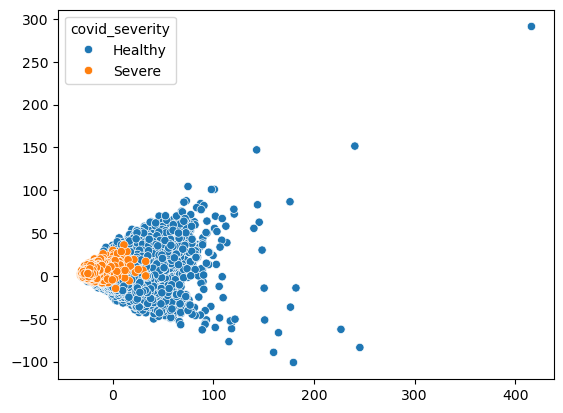

In [17]:
sns.scatterplot(x = adata.obsm['X_pca'][:,0],y =  adata.obsm['X_pca'][:,1], hue = adata.obs.covid_severity)
plt.show()
